In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
RES_DIR = "/Users/louis.kuemmerle/Promotion/projects/G1/results/spapros_smk_res_bm"

In [3]:
df_eval = pd.read_csv(Path(RES_DIR, "evaluation_overview.csv"),index_col=0)
df_data = pd.read_csv(Path(RES_DIR, "data_parameters.csv"),index_col=0)
df_sele = pd.read_csv(Path(RES_DIR, "selection_overview.csv"),index_col=0).set_index("selection_name")

df_eval["ct_key"] = df_eval["eval_data_id"].apply(lambda x: df_data.loc[x,"ct_key"])


In [4]:
SELECTION_BATCHS = ['batch_bm_1.1', 'batch_bm_1.2', 'batch_bm_1.3', 'batch_bm_2.1']
EVAL_BATCH = 'eval_batch_bm_1'

In [5]:
# Get metrics df
summary_files = df_eval.loc[
    (df_eval["eval_batch"] == EVAL_BATCH), "eval_summary_file"
].unique()

dataset_to_df_metrics = {
    s.split("/")[-1].rsplit("_",2)[0] : pd.read_csv(Path(RES_DIR, s),index_col=0) for s in summary_files if Path(RES_DIR, s).exists()
}
datasets = list(dataset_to_df_metrics.keys())

dfs_metrics = []
for dataset, df in dataset_to_df_metrics.items():
    df["dataset"] = dataset
    dfs_metrics.append(df)
    
df_metrics = pd.concat(dfs_metrics)

# Add selections info to metrics df
df_sele = df_sele.loc[df_sele["batch"].isin(SELECTION_BATCHS) & df_sele["dataset"].isin(datasets)] 
selections = df_sele.index.tolist()
df_metrics = df_metrics.loc[selections]
df_metrics["n"] = df_sele.loc[df_metrics.index, "n"].values
df_metrics["bootstrap_seed"] = df_sele.loc[df_metrics.index, "bootstrap_seed"].values
df_metrics["method"] = df_metrics.index.str.split("_").str[0]


# Calculate aggreate scores
df_metrics["ct score"] = (df_metrics['forest_clfs accuracy'] + df_metrics['forest_clfs perct acc > 0.8']) / 2
df_metrics["var score"] = (
    df_metrics['knn_overlap mean_overlap_AUC'] +
    df_metrics['cluster_similarity nmi_5_20'] +
    + df_metrics['cluster_similarity nmi_21_60']
) / 3
df_metrics["score"] = (df_metrics["ct score"] + df_metrics["var score"]) / 2

# Move aggregated score columns to beginning of df
for metric in ["var score", "ct score", "score"]:
    df_metrics.insert(0, metric, df_metrics.pop(metric))


In [7]:
for s in summary_files:
    print(Path(RES_DIR, s).exists(), "  -  " , s)

In [8]:
df_metrics

,score,ct score,var score,cluster_similarity nmi_5_20,cluster_similarity nmi_21_60,gene_corr 1 - mean,gene_corr perct max < 0.8,knn_overlap mean_overlap_AUC,forest_clfs accuracy,forest_clfs perct acc > 0.8,dataset,n,bootstrap_seed,method
spapros_0_Madissoon2019_w_cts_0,0.677717,0.821101,0.534334,0.793889,0.711280,0.839661,0.839231,0.097833,0.866478,0.775723,Madissoon2019_w_cts,50,0,spapros
spapros_1_Madissoon2019_w_cts_0,0.742447,0.846115,0.638779,0.842167,0.796431,0.857985,0.875491,0.277739,0.880576,0.811655,Madissoon2019_w_cts,150,0,spapros
spaproscto_2_Madissoon2019_w_cts_0,0.663924,0.825590,0.502258,0.784663,0.663928,0.880917,0.843616,0.058184,0.872156,0.779024,Madissoon2019_w_cts,50,0,spaproscto
spaproscto_3_Madissoon2019_w_cts_0,0.721492,0.883965,0.559019,0.823110,0.742267,0.882854,0.840540,0.111682,0.896524,0.871406,Madissoon2019_w_cts,150,0,spaproscto
DE_4_Madissoon2019_w_cts_0,0.657921,0.809214,0.506629,0.795519,0.658889,0.878541,0.769182,0.065478,0.861686,0.756741,Madissoon2019_w_cts,50,0,DE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
scmer_13_primary_motor_cortex_mmus-raw_subsampled_120,0.787517,0.981019,0.594016,0.911791,0.810900,0.743902,0.978025,0.059356,0.972593,0.989444,primary_motor_cortex_mmus-raw_subsampled,150,4,scmer
selfe_18_primary_motor_cortex_mmus-raw_subsampled_120,0.779793,0.978929,0.580657,0.906367,0.802093,0.850801,1.000000,0.033513,0.963162,0.994697,primary_motor_cortex_mmus-raw_subsampled,50,4,selfe
selfe_19_primary_motor_cortex_mmus-raw_subsampled_120,0.797740,0.984204,0.611276,0.927750,0.857998,0.905005,1.000000,0.048081,0.968408,1.000000,primary_motor_cortex_mmus-raw_subsampled,150,4,selfe
genebasis_22_primary_motor_cortex_mmus-raw_subsampled_120,0.757377,0.937177,0.577577,0.889085,0.797681,0.875886,0.962464,0.045964,0.957687,0.916667,primary_motor_cortex_mmus-raw_subsampled,50,4,genebasis


# Statistical tests over all datasets

In [9]:
from scipy.stats import ttest_rel

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap, to_rgba
import matplotlib.cm as cm

def get_pval_colormap(max_exp=5, n=256, p_val_th=0.05, cmap='gray', color='white'):
    """
    Usage: Add argument norm=matplotlib.colors.LogNorm(vmin=10**(-max_exp), vmax=1) to the plotting function
    
    e.g. 
        cmap = get_pval_colormap(max_exp=4)
        ax.pcolormesh(data, cmap=cmap, rasterized=True, norm=matplotlib.colors.LogNorm(vmin=10**(-4), vmax=1))
    
    """

    n_white = int(((- np.log(p_val_th) / np.log(10)) / max_exp) * n)

    # n_per_bin = n // max_exp
    # rest = n % max_exp
    # n_gray = n_per_bin*(max_exp-1) + rest
    n_cmap = n - n_white

    colormap = cm.get_cmap(cmap, n_cmap)
    newcolors = colormap(np.linspace(0, 1, n_cmap))
    # concat gray and white
    newcolors_const = np.repeat(np.array(to_rgba(color))[:, np.newaxis], n_white, axis=1).T
    newcolors = np.concatenate([newcolors, newcolors_const])
    #newcolors = np.concatenate([newcolors, np.ones((n_white, 4))])
    newcmp = ListedColormap(newcolors)

    return newcmp



def get_pval_df(df_metrics, n=50, metrics=["score", "ct score", "var score"]):
    """
    """
    
    df_ = df_metrics.loc[df_metrics["n"] == n].copy()
    df_ = df_.groupby(["dataset","method"]).mean().sort_values("score",ascending=False)
    df_.reset_index(inplace=True)
    df_.set_index("dataset",inplace=True)
    
    vcounts = df_["method"].value_counts()
    methods_w_datasets = vcounts[vcounts == vcounts.max()].index.tolist()
    metrics_ = metrics
    
    # pairwise t-tests among methods (pairwise per dataset)
    dfs_pval = {m:pd.DataFrame(index=methods_w_datasets, columns=methods_w_datasets, dtype=float) for m in metrics_}
    dfs_higher = {m:pd.DataFrame(index=methods_w_datasets, columns=methods_w_datasets, dtype=bool) for m in metrics_}
    
    for metric in metrics_:
        for method in methods_w_datasets:
            data1 = df_[df_["method"] == method][metric].values
            datasets_tmp = df_[df_["method"] == method].index.tolist()
            for method2 in methods_w_datasets:
                data2 = df_[df_["method"] == method2].loc[datasets_tmp,metric].values
                t_stat, p_value = ttest_rel(data1, data2)
                dfs_pval[metric].loc[method,method2] = p_value
                dfs_higher[metric].loc[method, method2] = t_stat < 0
                order = dfs_higher[metric].sum().sort_values(ascending=False).index.tolist()
                dfs_pval[metric] = dfs_pval[metric].loc[order,order]
                
    return dfs_pval


def plot_pval_df(df_pval, p_val_th=0.05, max_exp=3, figsize=(3, 2), save=False):
    """
    """
    
    fig = plt.figure(figsize=figsize)
    
    cmap = get_pval_colormap(max_exp=max_exp, n=256, p_val_th=p_val_th, cmap='Purples_r', color='lightgray')
    df_ = df_pval.copy()
    df_.values[np.tril_indices_from(df_, k=-1)] = np.nan
    #df_ = df_.iloc[:-1,1:]
    sns.heatmap(
        df_, annot=False, fmt=".4f", cmap=cmap, cbar_kws={'label': 'p-value'}, square=True,
        xticklabels=True, yticklabels=True, norm=matplotlib.colors.LogNorm(vmin=10**(-max_exp), vmax=1),
        linewidths=0.1, linecolor='white')
    ax = plt.gca()
    # labels
    ax.set_xlabel("selection method\n(lower performance)")
    ax.set_ylabel("selection method\n(higher performance)")
    # ticks and labels to top and right
    ax.xaxis.tick_top()  # x axis on top
    ax.xaxis.set_label_position('top')
    # Rotate tick labels 90°
    plt.xticks(rotation=90)
    # get colorbar axis
    cb = ax.collections[0].colorbar
    cb.ax.plot([0, 1], [p_val_th,p_val_th], 'rebeccapurple', linewidth=1) 
    cb.ax.text(1.6, p_val_th, str(p_val_th), va='center', ha='left', color='rebeccapurple')
    if save:
        fig.savefig(save, bbox_inches='tight', transparent=True)
    plt.show()
    

In [10]:
from matplotlib import rcParams
from matplotlib import colors

plt.rcParams['figure.dpi'] = 120  # 150
plt.rcParams['savefig.dpi'] = 300  # 150
SMALL_SIZE = 9  # 17
MEDIUM_SIZE = 11  # 19
BIGGER_SIZE = 13  # 21
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


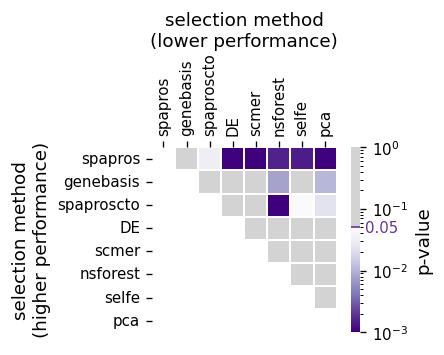

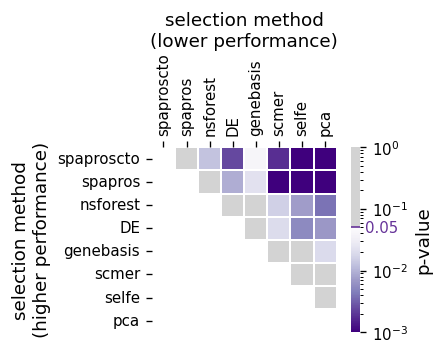

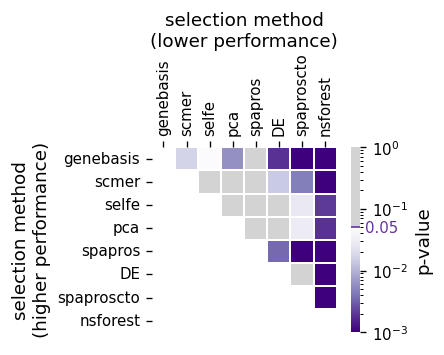

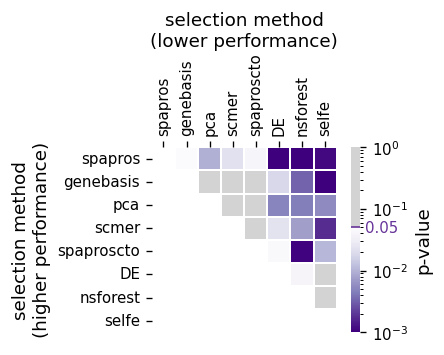

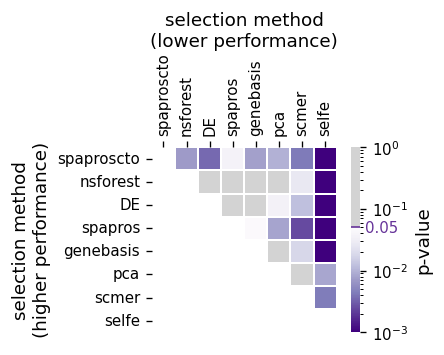

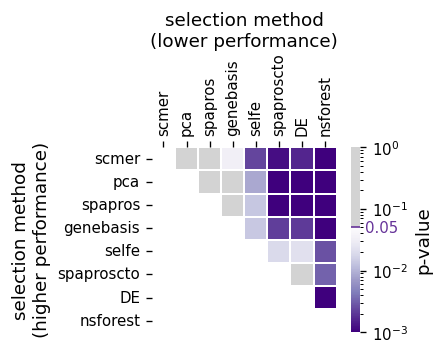

In [14]:
metrics = ["score", "ct score", "var score"]
for n in [50, 150]:
    dfs_pval = get_pval_df(df_metrics, n=n, metrics=metrics)
    for m in metrics:
        plot_pval_df(
            dfs_pval[m], p_val_th=0.05, max_exp=3, figsize=(3, 2), 
            save=f"./figures/1_bm_pval_heatmap_{n}_{m}.pdf"
        )


# Stats test per dataset

In [15]:
from scipy.stats import ttest_ind

methods = df_metrics["method"].unique()
datasets = df_metrics["dataset"].unique()
metrics = df_metrics.columns[:3] #[:8]

dfs = {metric:
    {n: {d:pd.DataFrame(index=methods,columns=methods,dtype=float) for d in datasets} for n in df_metrics["n"].unique()}
    for metric in metrics
}
method_ranking = {metric:{n: {d:[] for d in datasets} for n in df_metrics["n"].unique()} for metric in metrics}


for m in metrics: #[:8]:
    print("################### " + m + " ###################")
    for n in df_metrics["n"].unique():
        for d in datasets:
            subset = df_metrics[(df_metrics["dataset"] == d) & (df_metrics["n"] == n)]
            for method in methods:
                data1 = subset[subset["method"] == method][m].values
                for method2 in methods:
                    data2 = subset[subset["method"] == method2][m].values
                    t_stat, p_value = ttest_ind(data1, data2)
                    dfs[m][n][d].loc[method,method2] = p_value
            
            #method_ranking[n][d].append(dfs[n][d].rank().mean().sort_values().index.tolist())
            method_ranking[m][n][d] = subset.groupby("method")[m].mean().sort_values(ascending=False).index.tolist()
            
            # Order dfs by method ranking
            dfs[m][n][d] = dfs[m][n][d].loc[method_ranking[m][n][d],method_ranking[m][n][d]]
            

################### score ###################
################### ct score ###################
################### var score ###################


In [18]:
# NOTE: I have no idea why, but somehow I needed to adjust the lines where the triangle is cut off, would be good to understand why

def plot_pval_df2(df_pval, p_val_th=0.05, max_exp=3, figsize=(3, 2), save=False):
    """
    """

    fig = plt.figure(figsize=figsize)

    cmap = get_pval_colormap(
        max_exp=max_exp, n=256, p_val_th=p_val_th, cmap='Purples_r', color='lightgray')
    df_ = df_pval.copy()
    df_.values[np.tril_indices_from(df_, k=0)] = np.nan
    #df_ = df_.iloc[:-1, 1:]
    sns.heatmap(
        df_, annot=False, fmt=".4f", cmap=cmap, cbar_kws={'label': 'p-value'}, square=True,
        xticklabels=True, yticklabels=True, norm=matplotlib.colors.LogNorm(vmin=10**(-max_exp), vmax=1),
        linewidths=0.1, linecolor='white')
    ax = plt.gca()
    # labels
    ax.set_xlabel("selection method\n(lower performance)")
    ax.set_ylabel("selection method\n(higher performance)")
    # ticks and labels to top and right
    ax.xaxis.tick_top()  # x axis on top
    ax.xaxis.set_label_position('top')
    # Rotate tick labels 90°
    plt.xticks(rotation=90)
    # get colorbar axis
    cb = ax.collections[0].colorbar
    cb.ax.plot([0, 1], [p_val_th, p_val_th], 'rebeccapurple', linewidth=1)
    cb.ax.text(1.6, p_val_th, str(p_val_th), va='center',
               ha='left', color='rebeccapurple')
    if save:
        fig.savefig(save, bbox_inches='tight', transparent=True)
    plt.show()


50 score


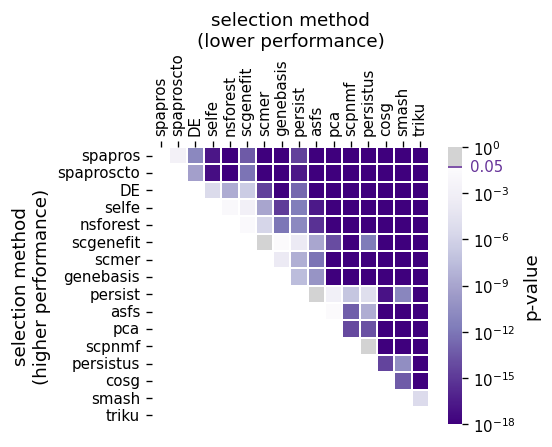

50 ct score


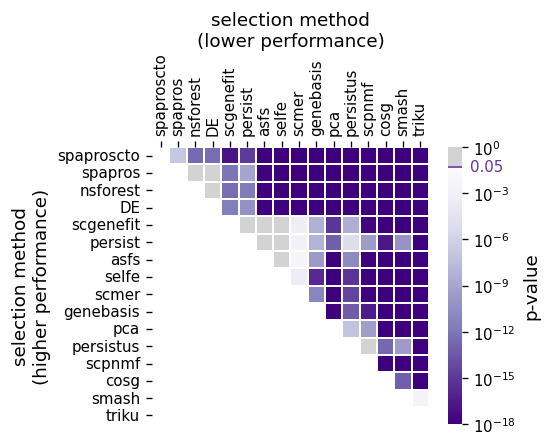

50 var score


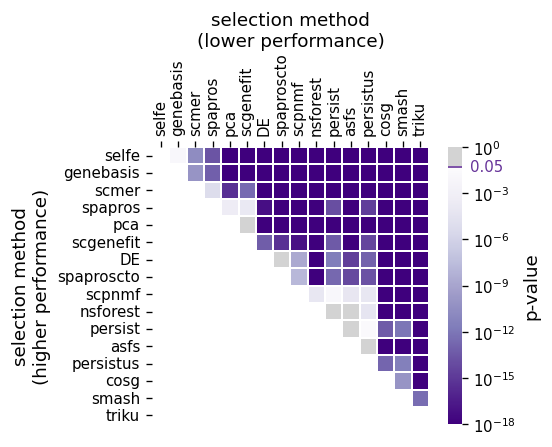

150 score


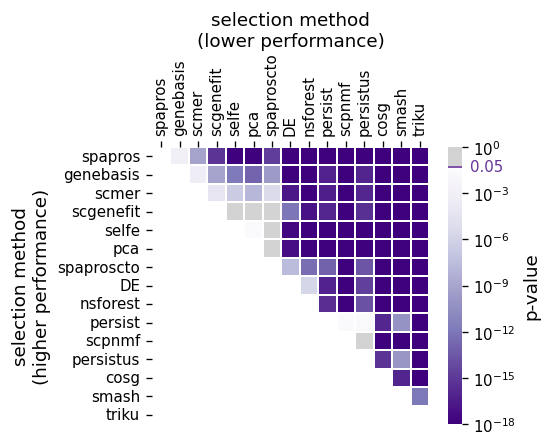

150 ct score


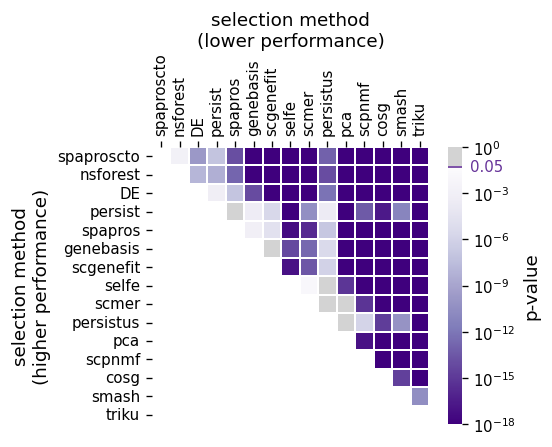

150 var score


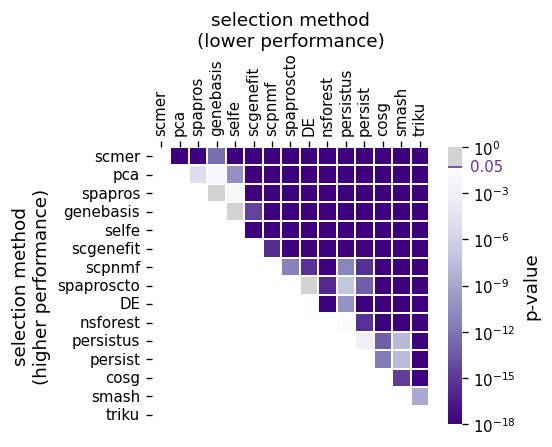

In [20]:
for n in [50, 150]:
    for m in ['score', 'ct score', 'var score']:
        print(n, m)
        plot_pval_df2(
            dfs[m][n]['Madissoon2019_w_cts'], p_val_th=0.05, max_exp=18, figsize=(4, 3),
            save=f"./figures/1_bm_pval_Mad_heatmap_{n}_{m}.pdf"
        )
